## Predicting a car's price using K Nearest Neighbors

We'll be using the UCI [Automobile data set](https://archive.ics.uci.edu/ml/datasets/automobile) in this project to determine car price's based on a set of features and we will utilize the K Nearest Neighbor model to do so. 

The dataset includes the following information:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
1. normalized-losses: continuous from 65 to 256.
1. make: text; type of car
1. fuel-type: diesel, gas.
1. aspiration: std, turbo.
1. num-of-doors: four, two.
1. body-style: hardtop, wagon, sedan, hatchback, convertible.
1. drive-wheels: 4wd, fwd, rwd.
1. engine-location: front, rear.
1. wheel-base: continuous from 86.6 120.9.
1. length: continuous from 141.1 to 208.1.
1. width: continuous from 60.3 to 72.3.
1. height: continuous from 47.8 to 59.8.
1. curb-weight: continuous from 1488 to 4066.
1. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
1. num-of-cylinders: eight, five, four, six, three, twelve, two.
1. engine-size: continuous from 61 to 326.
1. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
1. bore: continuous from 2.54 to 3.94.
1. stroke: continuous from 2.07 to 4.17.
1. compression-ratio: continuous from 7 to 23.
1. horsepower: continuous from 48 to 288.
1. peak-rpm: continuous from 4150 to 6600.
1. city-mpg: continuous from 13 to 49.
1. highway-mpg: continuous from 16 to 54.
1. price: continuous from 5118 to 45400.



In [125]:
import pandas as pd

data = pd.read_csv("imports-85.data")



In [126]:
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [127]:
cols = ['symboling','normalized_losses','make','fuel_type','aspiration',
        'num_of_doors','body_style','drive_wheels','engine_location','wheel_base',
        'length','width','height','curb_weight','engine_type','num_of_cylinders',
        'engine_size', 'fuel_system', 'bore','stroke','compression_ratio',
        'horsepower','peak_rpm','city_mpg','highway_mpg','price']

data = pd.read_csv("imports-85.data", names=cols)


In [128]:
pd.options.display.max_columns = 99
data.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [129]:
# Let's set all the continuous data to be our features in our model

continous_cols = ['normalized_losses','wheel_base','length','width',
                   'height','curb_weight','engine_size','bore',
                   'stroke','compression_ratio','horsepower',
                   'peak_rpm','city_mpg','highway_mpg','price']

numeric_car_data = data[continuous_cols]

target = ['price']

In [130]:
numeric_car_data.head()


,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data cleaning

Let's clean our data to ensure we don't have any issues that interfere with our model. Specifically:

1. Remove any missing values
1. Convert all columns to a numeric data type
1. Rescale all numeric values to be between 0 and 1

In [131]:
import numpy as np

numeric_car_data = numeric_car_data.replace('?', np.nan)

In [132]:
numeric_car_data.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [133]:
numeric_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [134]:
numeric_car_data = numeric_car_data.astype("float")

In [135]:
numeric_car_data.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [136]:
numeric_car_data.shape

(205, 15)

### Dealing with missing data

Since our dataset only has 205 rows, we don't want to drop any rows of missing data other than price (our predictor value). We'll replace the missing (NaN) valuse with the average of the columns instead.

In [137]:
numeric_car_data = numeric_car_data.dropna(subset=['price'])

In [138]:
numeric_car_data.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [139]:
numeric_car_data = numeric_car_data.fillna(numeric_car_data.mean())

In [140]:
numeric_car_data.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Rescale data

Below we'll rescale our data to normalize all rows except the price column.


In [141]:
price_col = numeric_car_data['price']

numeric_car_data = (numeric_car_data - numeric_car_data.min()) / (numeric_car_data.max() - numeric_car_data.min())

In [142]:
numeric_car_data['price'] = price_col

In [143]:
numeric_car_data.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Modeling - Univarite K-Nearest Neighbors

First, we'll start off with a univarite k-nearest neighbor model to structure our coe workflow and understand our features better.

In [144]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, dataframe):
    np.random.seed(1)
    
    # Randomize the rows in the dataframe
    random_index = np.random.permutation(dataframe.index)
    randomized_df = dataframe.reindex(random_index)
    
    # Split the dataframe into 50/50 train-test splits
    last_training_row = int(len(randomized_df) / 2)
    train_data = randomized_df[0:last_training_row]
    test_data = randomized_df[last_training_row:]
    
    # Initiate and create the model
    knn = KNeighborsRegressor()
    
    knn.fit(train_data[[train_col]], train_data[[target_col]])
    
    # Predict using the test data
    predictions = knn.predict(test_data[[train_col]])
    
    ## Calculate the RMSE and return the value
    rmse = mean_squared_error(test_data[target_col], predictions)**(1/2)
    return rmse
    


In [145]:
cols = numeric_car_data.columns.tolist()

cols.remove('price')

cols

['normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [146]:
rmse_results = {}
for col in cols:
    result = knn_train_test(col, 'price', numeric_car_data)
    rmse_results[col] = result
    
rmse_results

{'bore': 6780.627784685976,
 'city_mpg': 4766.422505090134,
 'compression_ratio': 6610.812153159129,
 'curb_weight': 4401.118254793124,
 'engine_size': 3238.4628296477176,
 'height': 8144.441042663747,
 'highway_mpg': 4630.026798588056,
 'horsepower': 4037.0377131537603,
 'length': 5427.2009608367125,
 'normalized_losses': 7330.197653434445,
 'peak_rpm': 7697.4596964334805,
 'stroke': 8006.529544647101,
 'wheel_base': 5461.553997873057,
 'width': 4704.482589704386}

In [147]:
# Convert to a series for sorting
rmse_results_series = pd.Series(rmse_results)

rmse_results_series.sort_values()

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

## Results

Based on our univarite model, it looks like **engine_size** is the feature that performed best in our K-Nearest Neighbors model with a default k value of 5.

Below, we'll modify the function to allow a k value to be inputted as a parameter.

In [149]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test_with_k_value(train_col, target_col, dataframe):
    np.random.seed(1)
    
    # Randomize the rows in the dataframe
    random_index = np.random.permutation(dataframe.index)
    randomized_df = dataframe.reindex(random_index)
    
    # Split the dataframe into 50/50 train-test splits
    last_training_row = int(len(randomized_df) / 2)
    train_data = randomized_df[0:last_training_row]
    test_data = randomized_df[last_training_row:]
    
    # Create k_value list
    k_values = [1,3,5,7,9]
    k_msre_results = {}
    
    for k in k_values:
    
    # Initiate and create the model
        knn = KNeighborsRegressor(n_neighbors=k)
    
        knn.fit(train_data[[train_col]], train_data[[target_col]])
    
        # Predict using the test data
        predictions = knn.predict(test_data[[train_col]])
    
        ## Calculate the RMSE and return the value
        rmse = mean_squared_error(test_data[target_col], predictions)**(1/2)
        
        k_msre_results[k] = rmse
        
    return k_msre_results
    


In [154]:
k_results = {}

for col in cols:
    result = knn_train_test_with_k_value(col, 'price', numeric_car_data)
    k_results[col] = result



In [155]:
k_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city_mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway_mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.849263088

## Visualizing Results

Below we'll use PyPlot to visualize the results of all our k-values and their performance based on the RMSE metric.

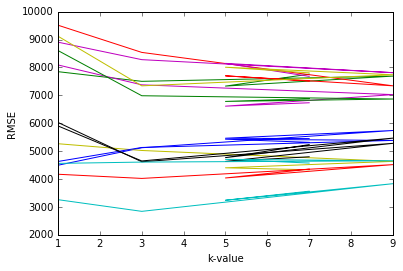

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline  

for k, v in k_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')
    

## Modeling - Multivariate Model K-Nearest Neighbors

Next we'll see what happens when we combine multiple features into our K-Nearest Neighbor function.

We'll test the top 2, 3, 4 and 5 features based on the results above, which are:

* engine_size - 3238.462830
* horsepower - 4037.037713
* curb_weight - 4401.118255
* highway_mpg - 4630.026799
* width - 4704.482590


In [168]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test_with_features(feature_list, target_col, dataframe):
    np.random.seed(1)
    
    # Randomize the rows in the dataframe
    random_index = np.random.permutation(dataframe.index)
    randomized_df = dataframe.reindex(random_index)
    
    # Split the dataframe into 50/50 train-test splits
    last_training_row = int(len(randomized_df) / 2)
    train_data = randomized_df[0:last_training_row]
    test_data = randomized_df[last_training_row:]
    
    # Initiate and create the model
    knn = KNeighborsRegressor()
    
    knn.fit(train_data[feature_list], train_data[[target_col]])
    
    # Predict using the test data
    predictions = knn.predict(test_data[feature_list])
    
    ## Calculate the RMSE and return the value
    rmse = mean_squared_error(test_data[target_col], predictions)**(1/2)
    return rmse
    


In [169]:
two_features = ['engine_size', 'horsepower']
three_features = ['engine_size', 'horsepower', 'curb_weight']
four_features = ['engine_size', 'horsepower', 'curb_weight', 'highway_mpg']
five_features = ['engine_size', 'horsepower', 'curb_weight', 'highway_mpg', 'width']

knn_two_features = knn_train_test_with_features(two_features, 'price', numeric_car_data)
knn_three_features = knn_train_test_with_features(three_features, 'price', numeric_car_data)
knn_four_features = knn_train_test_with_features(four_features, 'price', numeric_car_data)
knn_five_features = knn_train_test_with_features(five_features, 'price', numeric_car_data)

In [170]:
print("Two Features: ", knn_two_features)
print("Three Features: ", knn_three_features)
print("Four Features: ", knn_four_features)
print("Five Features: ", knn_five_features)

Two Features:  2949.8817277180374
Three Features:  3435.2601095401815
Four Features:  3286.5597353252815
Five Features:  3410.2170133901805


### Tuning Hyperparmeters 

Based on our results above, let's tune the hyperparameters to find the optimal k-value'. We'll use the top 3 models which are:

1. Two Features
1. Four Features
1. Five Features

In [176]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test_with_features_and_k_values(feature_list, target_col, dataframe):
    np.random.seed(1)
    
    # Randomize the rows in the dataframe
    random_index = np.random.permutation(dataframe.index)
    randomized_df = dataframe.reindex(random_index)
    
    # Split the dataframe into 50/50 train-test splits
    last_training_row = int(len(randomized_df) / 2)
    train_data = randomized_df[0:last_training_row]
    test_data = randomized_df[last_training_row:]
    
    # Create k_value list
    k_values = [x for x in range(1,26)]
    k_msre_results = {}
    
    for k in k_values:
    
    # Initiate and create the model
        knn = KNeighborsRegressor(n_neighbors=k)
    
        knn.fit(train_data[feature_list], train_data[[target_col]])

        # Predict using the test data
        predictions = knn.predict(test_data[feature_list])
    
        ## Calculate the RMSE and return the value
        rmse = mean_squared_error(test_data[target_col], predictions)**(1/2)
        
        k_msre_results[k] = rmse
        
    return k_msre_results
    


In [178]:
two_features = ['engine_size', 'horsepower']
four_features = ['engine_size', 'horsepower', 'curb_weight', 'highway_mpg']
five_features = ['engine_size', 'horsepower', 'curb_weight', 'highway_mpg', 'width']

hyper_param_results = {}

for col in cols:
    result = knn_train_test_with_features_and_k_values(two_features, 'price', numeric_car_data)
    hyper_param_results["two features: "] = result
    
for col in cols:
    result = knn_train_test_with_features_and_k_values(four_features, 'price', numeric_car_data)
    hyper_param_results["four features: "] = result

for col in cols:
    result = knn_train_test_with_features_and_k_values(five_features, 'price', numeric_car_data)
    hyper_param_results["five features: "] = result




In [179]:
hyper_param_results

{'five features: ': {1: 2824.7061233282866,
  2: 2915.6731645496975,
  3: 3012.4204546509704,
  4: 3202.8876051367483,
  5: 3410.2170133901805,
  6: 3618.4509432660384,
  7: 3622.6290209234803,
  8: 3848.635835654326,
  9: 3977.8149139381726,
  10: 3994.8132211260104,
  11: 4159.843526607947,
  12: 4294.3389473154875,
  13: 4380.848359486949,
  14: 4466.368754416089,
  15: 4522.420711094978,
  16: 4536.427578452413,
  17: 4587.098443664006,
  18: 4622.107837952761,
  19: 4612.890107622797,
  20: 4632.693976139521,
  21: 4712.917548435062,
  22: 4676.301064518744,
  23: 4691.189310956096,
  24: 4755.990767231825,
  25: 4804.323266214411},
 'four features: ': {1: 2927.820116343107,
  2: 2600.431466008274,
  3: 2799.0983199667144,
  4: 3074.9999988931822,
  5: 3286.5597353252815,
  6: 3705.1702717384333,
  7: 3822.180444798032,
  8: 3986.7014080509525,
  9: 4210.340136384571,
  10: 4213.315457869819,
  11: 4182.323353796191,
  12: 4288.696189501458,
  13: 4249.894628724804,
  14: 4357.287

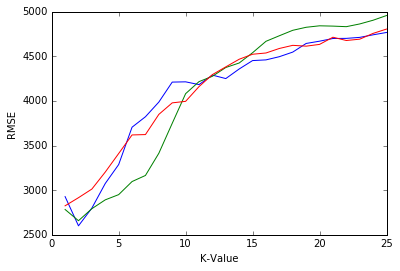

In [185]:
for k, v in hyper_param_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('K-Value')
    plt.ylabel('RMSE')
    

## Results of HyperParameter Tests  & Next Steps

* The K-Value of 2 appears to be optimal for each model.
* The values are not that different, likely due to car features such as engine size, horsepower, weight and highway MPG to be related to one another.
* We also ultimately see our model can predict the price of a car within ~$3,000.

## Next Steps

For next steps, It would be best to:

1. Modify our knn_train_test function to use k-fold cross validation instead of train/test validaiton
